source: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./vehicles.csv")
df.shape

(426880, 26)

## eda

Basic data cleaning

Check duplicates

In [3]:
df.duplicated().any()

False

In [4]:
df, test = train_test_split(df, train_size=0.8, random_state=42)
df.reset_index(inplace=True, drop=True)
df.shape

(341504, 26)

In [5]:
process_pipline = []

Check for NULL values

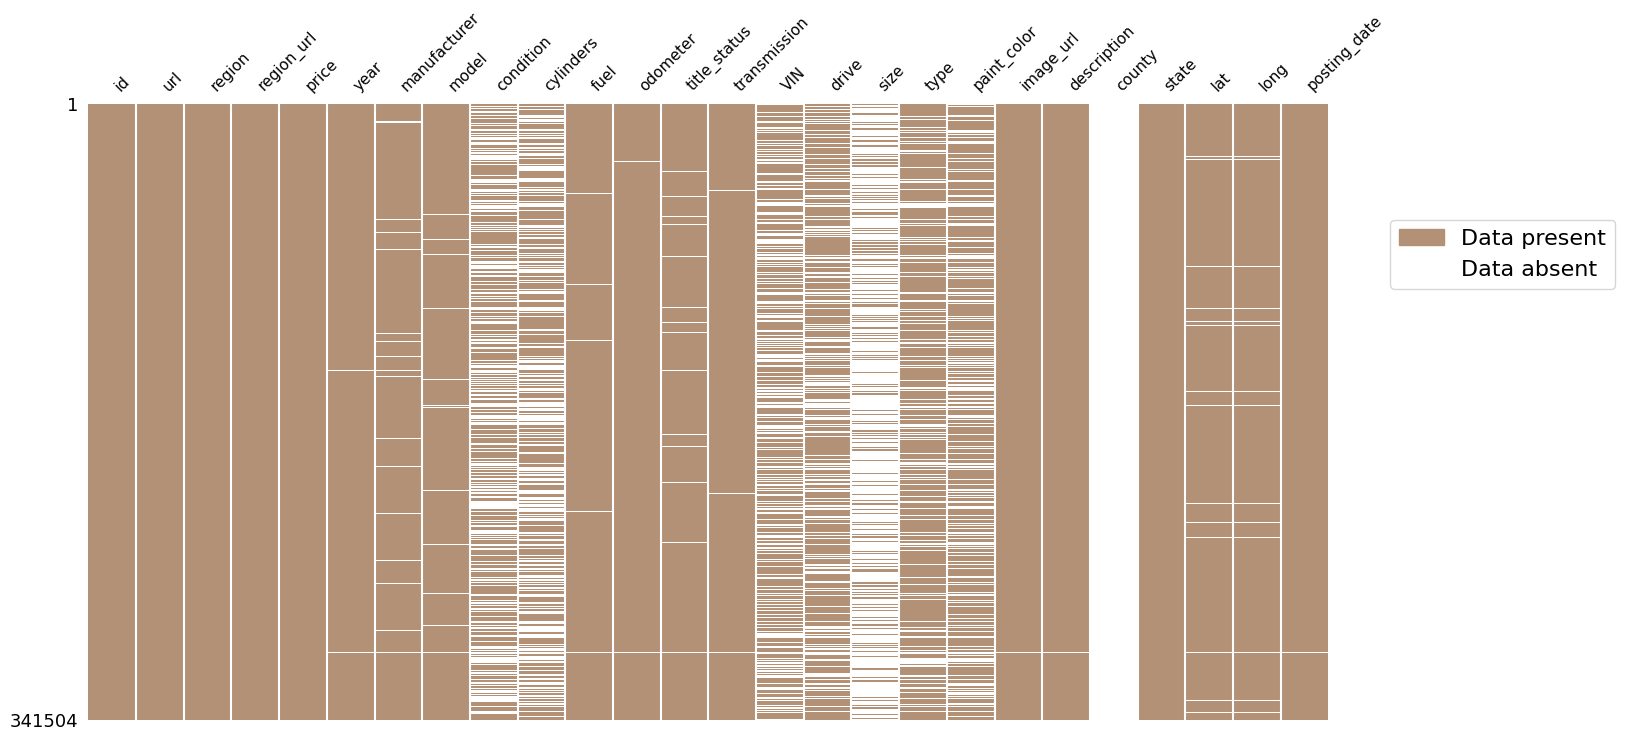

In [6]:
import matplotlib.patches as mpatches

msno.matrix(df, sparkline=False, figsize=(16,8), fontsize=11, color=(0.7, 0.57, 0.47))

gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')

plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

In [7]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.284330
manufacturer      4.117668
model             1.236882
condition        40.833782
cylinders        41.670376
fuel              0.695453
odometer          1.038055
title_status      1.919158
transmission      0.591794
VIN              37.698826
drive            30.594371
size             71.726832
type             21.784518
paint_color      30.537856
image_url         0.016105
description       0.016691
county          100.000000
state             0.000000
lat               1.523555
long              1.523555
posting_date      0.016105
dtype: float64

100% missing values in county col, drop

In [8]:
def transform1(df):
    df.drop(columns="county", inplace=True)
transform1(df)
process_pipline.append(transform1)

Most values in size are NULL also drop

In [9]:
def transform2(df):
    df.drop(columns="size", inplace=True)
transform2(df)
process_pipline.append(transform2)

In [10]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.284330
manufacturer     4.117668
model            1.236882
condition       40.833782
cylinders       41.670376
fuel             0.695453
odometer         1.038055
title_status     1.919158
transmission     0.591794
VIN             37.698826
drive           30.594371
type            21.784518
paint_color     30.537856
image_url        0.016105
description      0.016691
state            0.000000
lat              1.523555
long             1.523555
posting_date     0.016105
dtype: float64

In [11]:
#Find all columns with >10% NULL values
df.columns[np.where(df.isnull().sum()/df.shape[0]*100>10)]

Index(['condition', 'cylinders', 'VIN', 'drive', 'type', 'paint_color'], dtype='object')

In [12]:
#Drop all rows with missing values in all of them
def transform3(df):
    df.drop(index=np.where(df[['condition', 'cylinders', 'VIN', 'drive', 'type', 'paint_color']].isnull().all(axis=1))[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
transform3(df)
process_pipline.append(transform3)
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
272355,7314606045,https://nwga.craigslist.org/ctd/d/fort-ogletho...,northwest GA,https://nwga.craigslist.org,31590,2019.0,cadillac,xt4 sport suv 4d,good,NaN,...,1GYFZER40KF121673,fwd,hatchback,black,https://images.craigslist.org/00v0v_Nmw3hmqa7i...,Carvana is the safer way to buy a car During t...,ga,34.920000,-85.250000,2021-04-29T20:01:44-0400
67478,7314751448,https://newjersey.craigslist.org/ctd/d/port-mu...,north jersey,https://newjersey.craigslist.org,15995,2006.0,chevrolet,silverado 3500,good,NaN,...,1GBJK34D46E142512,NaN,NaN,blue,https://images.craigslist.org/00Z0Z_sHKvD5pYgi...,4x4 automatic 92k miles Equipped with central ...,nj,40.790600,-74.916700,2021-04-30T09:13:24-0400
203003,7315048755,https://chicago.craigslist.org/nwc/ctd/d/cryst...,chicago,https://chicago.craigslist.org,8495,2013.0,hyundai,elantra,NaN,4 cylinders,...,KMHD35LE8DU078372,fwd,NaN,NaN,https://images.craigslist.org/00Q0Q_AZ4rpWhDFy...,All qualified vehicles at Foxx Motors come wit...,il,42.230800,-88.332400,2021-04-30T16:54:08-0500
198035,7314781580,https://nh.craigslist.org/ctd/d/manchester-200...,new hampshire,https://nh.craigslist.org,6550,2008.0,audi,a4,excellent,6 cylinders,...,NaN,4wd,sedan,grey,https://images.craigslist.org/00U0U_6HJTb7mUme...,2008 *** Audi A4 4dr Sdn Auto 3.2L quattro Sed...,nh,43.036758,-71.414421,2021-04-30T10:15:41-0400
6705,7306950625,https://grandrapids.craigslist.org/ctd/d/coope...,grand rapids,https://grandrapids.craigslist.org,46995,2017.0,gmc,sierra 1500,excellent,8 cylinders,...,3GTU2PEJ3HG381663,4wd,truck,white,https://images.craigslist.org/00z0z_hTdXXvN1mD...,2017 GMC Sierra 1500 Denali Crew Cab AWD - $46...,mi,43.057538,-85.954644,2021-04-14T19:00:05-0400


<Axes: xlabel='price', ylabel='Count'>

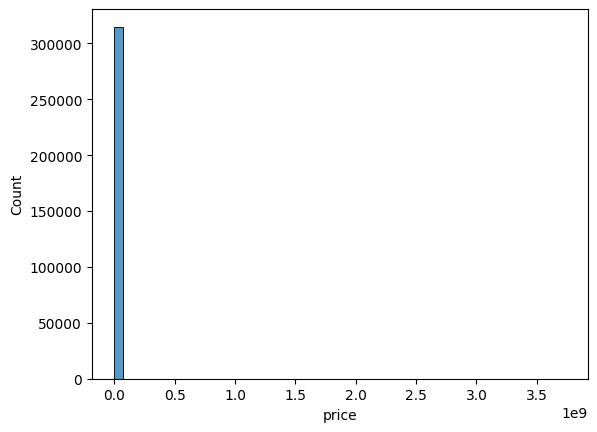

In [13]:
sns.histplot(df['price'], bins=50)

In [14]:
df['price'].describe()

count    3.149750e+05
mean     4.427577e+04
std      7.727094e+06
min      0.000000e+00
25%      6.000000e+03
50%      1.450000e+04
75%      2.699000e+04
max      3.736929e+09
Name: price, dtype: float64

In [15]:
#Car prices should range in the thousands to ten millions generally
def clean_prices1(df):
    df.drop(np.where((df["price"]<1000)|(df["price"]>=1e+08))[0], inplace=True)
    df.reset_index(inplace=True, drop=True)
clean_prices1(df)
process_pipline.append(clean_prices1)

In [16]:
df['price'].describe()

count    2.819560e+05
mean     2.020822e+04
std      5.592089e+04
min      1.000000e+03
25%      8.099000e+03
50%      1.653900e+04
75%      2.850000e+04
max      1.700000e+07
Name: price, dtype: float64

In [17]:
#Apply log to rescale prices onto a similar scale
def clean_prices2(df):
    df['price'] = np.log(df['price'])
clean_prices2(df)
process_pipline.append(clean_prices2)

Text(0.5, 0, 'log_price')

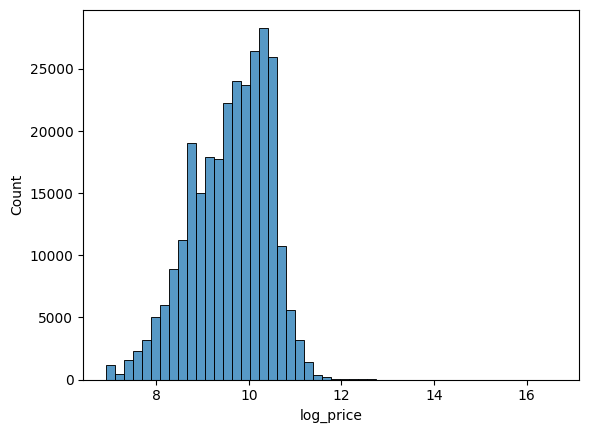

In [18]:
sns.histplot(df['price'], bins=50)
plt.xlabel("log_price")

In [19]:
#Log prices are relatively normal

<Axes: xlabel='condition', ylabel='price'>

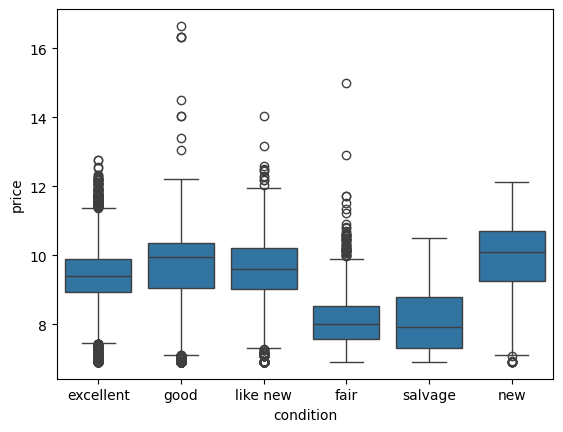

In [20]:
#Check if condition is worth imputing
sns.boxplot(df, x='condition', y='price')

<Axes: xlabel='condition', ylabel='price'>

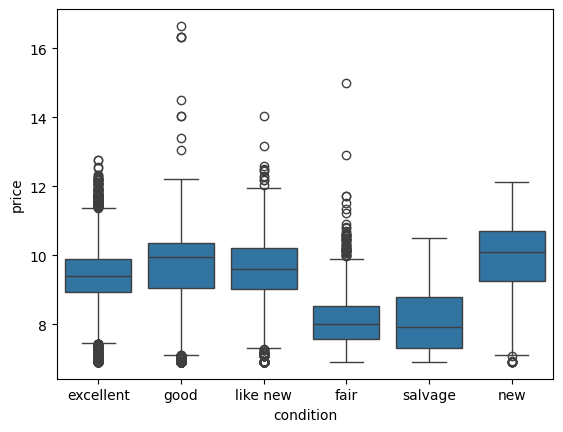

In [21]:
sns.boxplot(df, x='condition', y='price')

Median of price appear to change with different conditions, might be worth imputing

<Axes: >

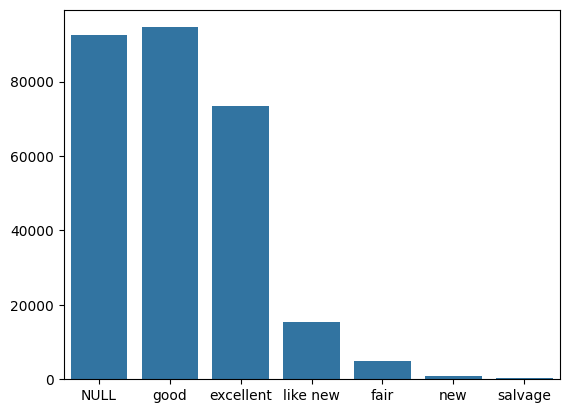

In [22]:
#Inspect condition
sns.barplot(pd.concat([pd.Series(df['condition'].isnull().sum(), index=["NULL"]), df['condition'].value_counts()]))

In [23]:
#Substantial amount of missing values maybe we can label as something like unknown condition
#Intuition: as a consumer if information is missing we might consider to pay at another price point
def transform5(df):
    df.loc[np.where(df['condition'].isnull())[0], 'condition'] = 'Unknown condition'
transform5(df)
process_pipline.append(transform5)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Unknown condition'),
  Text(1, 0, 'excellent'),
  Text(2, 0, 'good'),
  Text(3, 0, 'like new'),
  Text(4, 0, 'fair'),
  Text(5, 0, 'salvage'),
  Text(6, 0, 'new')])

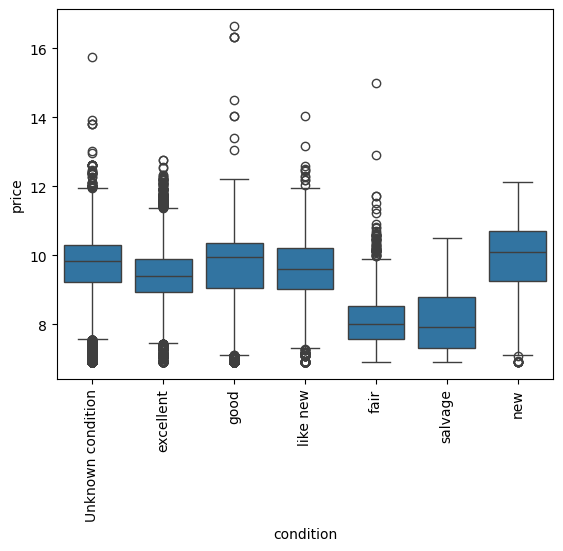

In [24]:
sns.boxplot(df, x='condition', y='price')
plt.xticks(rotation=90)

Prices still vary with condition might be valid filler

In [25]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.315297
manufacturer     3.757679
model            0.940927
condition        0.000000
cylinders       36.162735
fuel             0.712168
odometer         0.568528
title_status     1.824753
transmission     0.494049
VIN             33.514804
drive           24.776206
type            15.146690
paint_color     22.961029
image_url        0.000000
description      0.000355
state            0.000000
lat              0.946956
long             0.946956
posting_date     0.000000
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '8 cylinders'),
  Text(1, 0, '6 cylinders'),
  Text(2, 0, '4 cylinders'),
  Text(3, 0, '5 cylinders'),
  Text(4, 0, 'other'),
  Text(5, 0, '3 cylinders'),
  Text(6, 0, '10 cylinders'),
  Text(7, 0, '12 cylinders')])

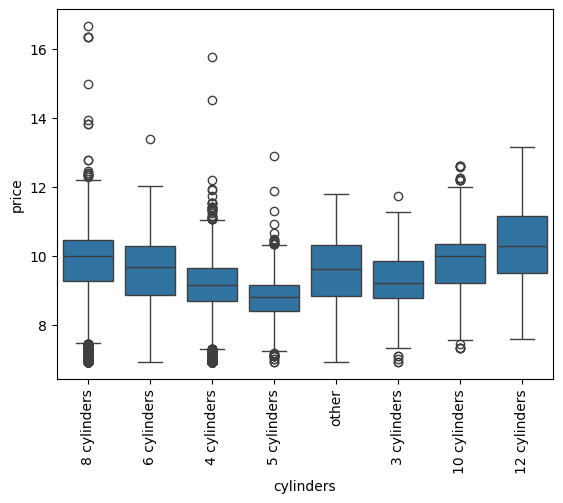

In [26]:
sns.boxplot(df, x='cylinders', y='price')
plt.xticks(rotation=90)

Median of price appear to change with different cylinder types, might be worth imputing

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'NULL'),
  Text(1, 0, '6 cylinders'),
  Text(2, 0, '4 cylinders'),
  Text(3, 0, '8 cylinders'),
  Text(4, 0, '5 cylinders'),
  Text(5, 0, '10 cylinders'),
  Text(6, 0, 'other'),
  Text(7, 0, '3 cylinders'),
  Text(8, 0, '12 cylinders')])

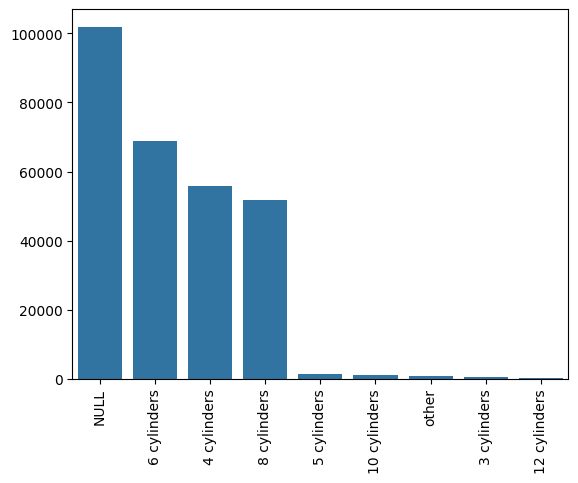

In [27]:
sns.barplot(pd.concat([pd.Series(df['cylinders'].isnull().sum(), index=["NULL"]), df['cylinders'].value_counts()]))
plt.xticks(rotation=90)

Note the very low counts of some cylinder types relative to the rest of the cylinder types, extreme imbalance might be worth binning them all together into others category

In [28]:
def transform6(df):
    labels_to_map = ["10 cylinders", "5 cylinders", "3 cylinders", "12 cylinders", "other"]
    df['cylinders'] = df['cylinders'].apply(lambda x: 'other' if x in labels_to_map else x)
transform6(df)
process_pipline.append(transform6)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'NULL'),
  Text(1, 0, '6 cylinders'),
  Text(2, 0, '4 cylinders'),
  Text(3, 0, '8 cylinders'),
  Text(4, 0, 'other')])

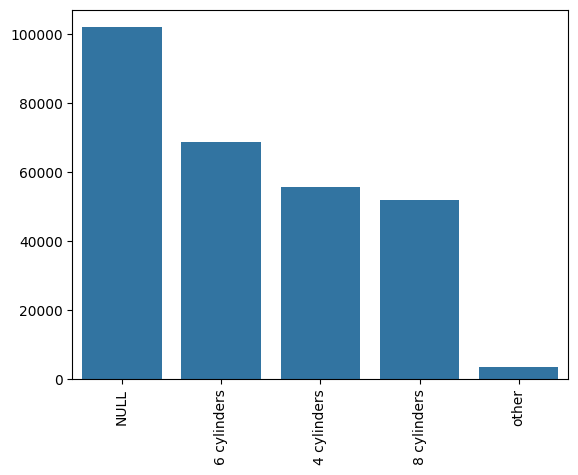

In [29]:
sns.barplot(pd.concat([pd.Series(df['cylinders'].isnull().sum(), index=["NULL"]), df['cylinders'].value_counts()]))
plt.xticks(rotation=90)

Still pretty bad but much better now

In [30]:
#Repeat the same logic for fixing NULL values
def transform7(df):
    df.loc[np.where(df['cylinders'].isnull())[0], 'cylinders'] = 'Unknown Cylinders'
transform7(df)
process_pipline.append(transform7)

([0, 1, 2, 3, 4],
 [Text(0, 0, '8 cylinders'),
  Text(1, 0, 'Unknown Cylinders'),
  Text(2, 0, '6 cylinders'),
  Text(3, 0, '4 cylinders'),
  Text(4, 0, 'other')])

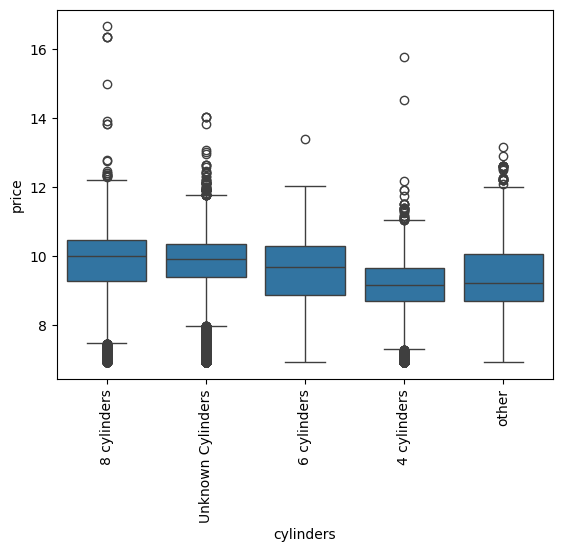

In [31]:
sns.boxplot(df, x='cylinders', y='price')
plt.xticks(rotation=90)

Still can see some variation in price

In [32]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.315297
manufacturer     3.757679
model            0.940927
condition        0.000000
cylinders        0.000000
fuel             0.712168
odometer         0.568528
title_status     1.824753
transmission     0.494049
VIN             33.514804
drive           24.776206
type            15.146690
paint_color     22.961029
image_url        0.000000
description      0.000355
state            0.000000
lat              0.946956
long             0.946956
posting_date     0.000000
dtype: float64

In [33]:
df['VIN'].nunique()
#Just create a new column of whether we have a VIN or not all are unique anywaya

87872

In [34]:
def transform8(df):
    #1 for has VIN 0 otherwise
    df['has_VIN'] = np.where(df['VIN'].isnull(), 0, 1)
    #drop the VIN col
    df.drop(columns="VIN", inplace=True)
transform8(df)
process_pipline.append(transform8)

<Axes: xlabel='has_VIN', ylabel='price'>

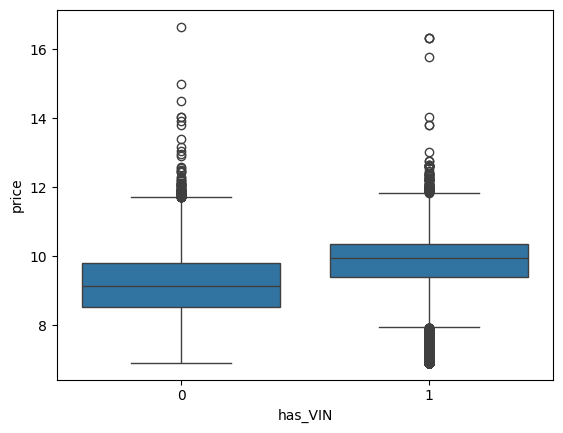

In [35]:
sns.boxplot(df, x='has_VIN', y='price')

median price influenced by presence of VIN

In [36]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.315297
manufacturer     3.757679
model            0.940927
condition        0.000000
cylinders        0.000000
fuel             0.712168
odometer         0.568528
title_status     1.824753
transmission     0.494049
drive           24.776206
type            15.146690
paint_color     22.961029
image_url        0.000000
description      0.000355
state            0.000000
lat              0.946956
long             0.946956
posting_date     0.000000
has_VIN          0.000000
dtype: float64

<Axes: xlabel='drive', ylabel='price'>

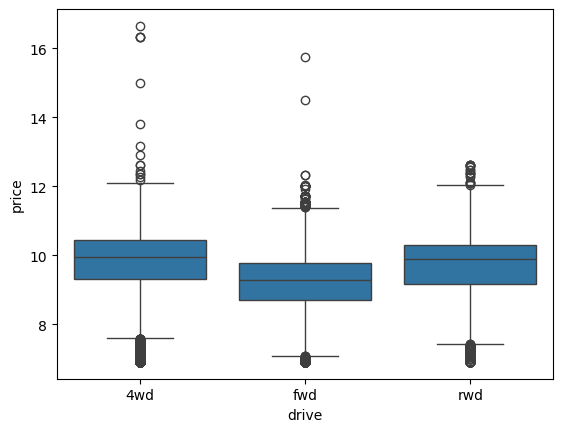

In [37]:
sns.boxplot(df, x='drive', y='price')

median price varies with drive type might be worth imputing

In [38]:
#Inspect drive
df['drive'].value_counts()

drive
4wd    92840
fwd    75996
rwd    43262
Name: count, dtype: int64

In [39]:
#All valid types are already listed
#Similarly temporarily label as unknown drive type(udt)
def transform9(df):
    df.loc[np.where(df['drive'].isnull())[0], 'drive'] = 'udt'
transform9(df)
process_pipline.append(transform9)

<Axes: xlabel='drive', ylabel='price'>

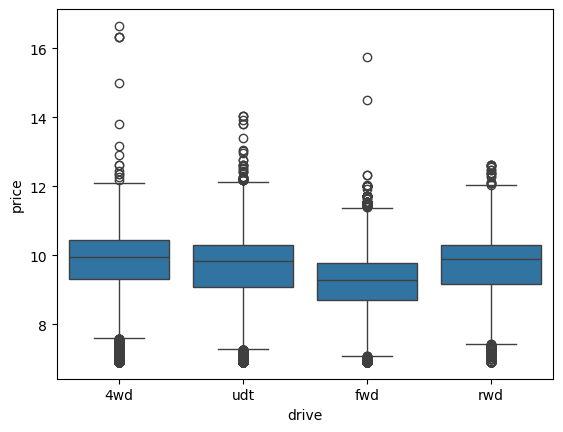

In [40]:
sns.boxplot(df, x='drive', y='price')

prices vary slightly

In [41]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.315297
manufacturer     3.757679
model            0.940927
condition        0.000000
cylinders        0.000000
fuel             0.712168
odometer         0.568528
title_status     1.824753
transmission     0.494049
drive            0.000000
type            15.146690
paint_color     22.961029
image_url        0.000000
description      0.000355
state            0.000000
lat              0.946956
long             0.946956
posting_date     0.000000
has_VIN          0.000000
dtype: float64

In [42]:
#inspect paint color
df['paint_color'].value_counts()

paint_color
white     57325
black     46125
silver    31393
blue      23042
red       22696
grey      17811
green      5470
custom     4922
brown      4865
yellow     1601
orange     1448
purple      518
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'black'),
  Text(1, 0, 'white'),
  Text(2, 0, 'orange'),
  Text(3, 0, 'silver'),
  Text(4, 0, 'blue'),
  Text(5, 0, 'red'),
  Text(6, 0, 'grey'),
  Text(7, 0, 'green'),
  Text(8, 0, 'custom'),
  Text(9, 0, 'yellow'),
  Text(10, 0, 'brown'),
  Text(11, 0, 'purple')])

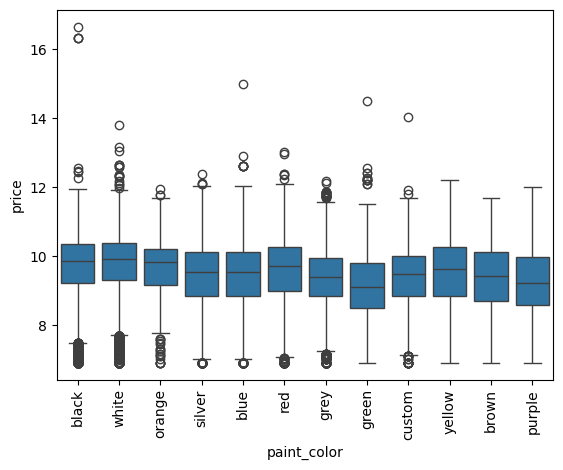

In [43]:
sns.boxplot(df, x='paint_color', y='price')
plt.xticks(rotation=90)

It seems color also influence prices, seen by varying median

In [44]:
#just mark as unknown since custom falls under "others" category
def transform10(df):
    df.loc[np.where(df['paint_color'].isnull())[0], 'paint_color'] = 'Unknown Color'
transform10(df)
process_pipline.append(transform10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'black'),
  Text(1, 0, 'white'),
  Text(2, 0, 'orange'),
  Text(3, 0, 'silver'),
  Text(4, 0, 'Unknown Color'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'red'),
  Text(7, 0, 'grey'),
  Text(8, 0, 'green'),
  Text(9, 0, 'custom'),
  Text(10, 0, 'yellow'),
  Text(11, 0, 'brown'),
  Text(12, 0, 'purple')])

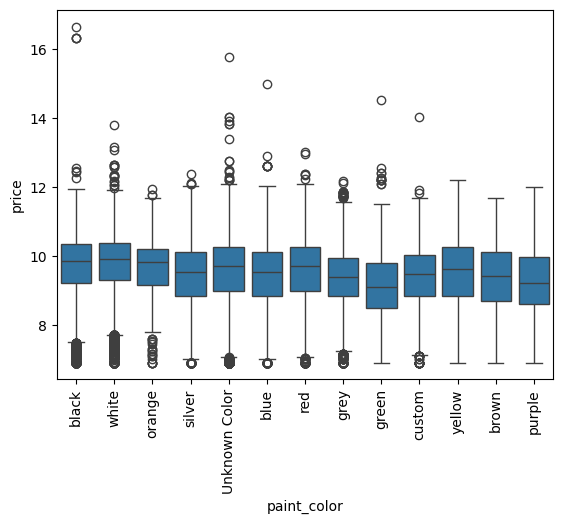

In [45]:
sns.boxplot(df, x='paint_color', y='price')
plt.xticks(rotation=90)

In [46]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id               0.000000
url              0.000000
region           0.000000
region_url       0.000000
price            0.000000
year             0.315297
manufacturer     3.757679
model            0.940927
condition        0.000000
cylinders        0.000000
fuel             0.712168
odometer         0.568528
title_status     1.824753
transmission     0.494049
drive            0.000000
type            15.146690
paint_color      0.000000
image_url        0.000000
description      0.000355
state            0.000000
lat              0.946956
long             0.946956
posting_date     0.000000
has_VIN          0.000000
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'truck'),
  Text(1, 0, 'other'),
  Text(2, 0, 'SUV'),
  Text(3, 0, 'pickup'),
  Text(4, 0, 'sedan'),
  Text(5, 0, 'van'),
  Text(6, 0, 'coupe'),
  Text(7, 0, 'convertible'),
  Text(8, 0, 'hatchback'),
  Text(9, 0, 'offroad'),
  Text(10, 0, 'wagon'),
  Text(11, 0, 'mini-van'),
  Text(12, 0, 'bus')])

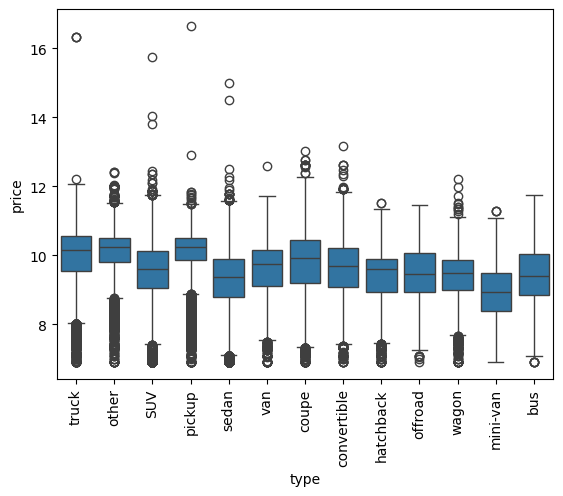

In [47]:
sns.boxplot(df, x='type', y='price')
plt.xticks(rotation=90)

type also vary

In [48]:
#Look at type
df['type'].value_counts()

type
sedan          61853
SUV            54483
pickup         32785
truck          23457
other          15703
coupe          14105
hatchback      12488
wagon           7803
van             6210
convertible     5889
mini-van        3634
offroad          462
bus              377
Name: count, dtype: int64

In [49]:
#just mark as unknown since others category exists
def transform11(df):
    df.loc[np.where(df['type'].isnull())[0], 'type'] = 'Unknown Type'
transform11(df)
process_pipline.append(transform11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'truck'),
  Text(1, 0, 'other'),
  Text(2, 0, 'SUV'),
  Text(3, 0, 'pickup'),
  Text(4, 0, 'sedan'),
  Text(5, 0, 'Unknown Type'),
  Text(6, 0, 'van'),
  Text(7, 0, 'coupe'),
  Text(8, 0, 'convertible'),
  Text(9, 0, 'hatchback'),
  Text(10, 0, 'offroad'),
  Text(11, 0, 'wagon'),
  Text(12, 0, 'mini-van'),
  Text(13, 0, 'bus')])

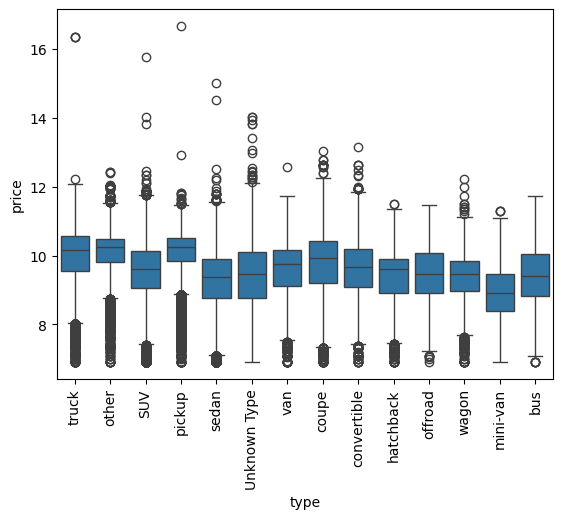

In [50]:
sns.boxplot(df, x='type', y='price')
plt.xticks(rotation=90)

In [51]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.315297
manufacturer    3.757679
model           0.940927
condition       0.000000
cylinders       0.000000
fuel            0.712168
odometer        0.568528
title_status    1.824753
transmission    0.494049
drive           0.000000
type            0.000000
paint_color     0.000000
image_url       0.000000
description     0.000355
state           0.000000
lat             0.946956
long            0.946956
posting_date    0.000000
has_VIN         0.000000
dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'ford'),
  Text(1, 0, 'buick'),
  Text(2, 0, 'subaru'),
  Text(3, 0, 'bmw'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'hyundai'),
  Text(6, 0, 'chevrolet'),
  Text(7, 0, 'toyota'),
  Text(8, 0, 'honda'),
  Text(9, 0, 'lexus'),
  Text(10, 0, 'acura'),
  Text(11, 0, 'infiniti'),
  Text(12, 0, 'mini'),
  Text(13, 0, 'volvo'),
  Text(14, 0, 'lincoln'),
  Text(15, 0, 'volkswagen'),
  Text(16, 0, 'mercedes-benz'),
  Text(17, 0, 'chrysler'),
  Text(18, 0, 'gmc'),
  Text(19, 0, 'ram'),
  Text(20, 0, 'kia'),
  Text(21, 0, 'cadillac'),
  Text(22, 0, 'nissan'),
  Text(23, 0, 'porsche'),
  Text(24, 0, 'jeep'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'audi'),
  Text(27, 0, 'rover'),
  Text(28, 0, 'mazda'),
  Text(29, 0, 'jaguar'),
  Text(30, 0, 'pon

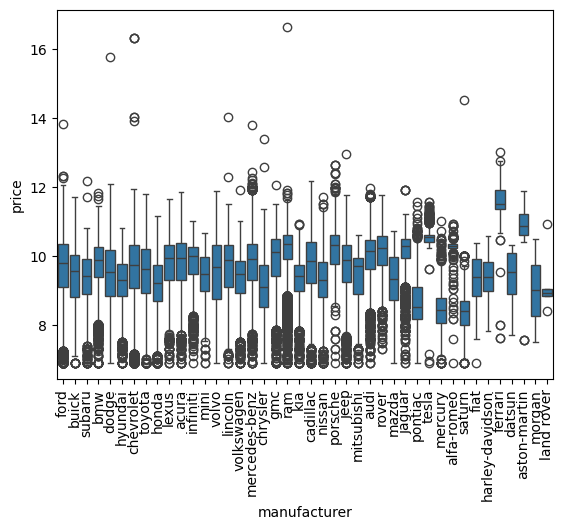

In [52]:
sns.boxplot(df, x='manufacturer', y='price')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'ford'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'honda'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'gmc'),
  Text(8, 0, 'bmw'),
  Text(9, 0, 'dodge'),
  Text(10, 0, 'mercedes-benz'),
  Text(11, 0, 'hyundai'),
  Text(12, 0, 'subaru'),
  Text(13, 0, 'volkswagen'),
  Text(14, 0, 'lexus'),
  Text(15, 0, 'kia'),
  Text(16, 0, 'audi'),
  Text(17, 0, 'cadillac'),
  Text(18, 0, 'acura'),
  Text(19, 0, 'chrysler'),
  Text(20, 0, 'buick'),
  Text(21, 0, 'mazda'),
  Text(22, 0, 'infiniti'),
  Text(23, 0, 'lincoln'),
  Text(24, 0, 'volvo'),
  Text(25, 0, 'mitsubishi'),
  Text(26, 0, 'mini'),
  Text(27, 0, 'rover'),
  Text(28, 0, 'pontiac'),
  Text(29, 0, 'jaguar'),
  Text(30, 0, 'por

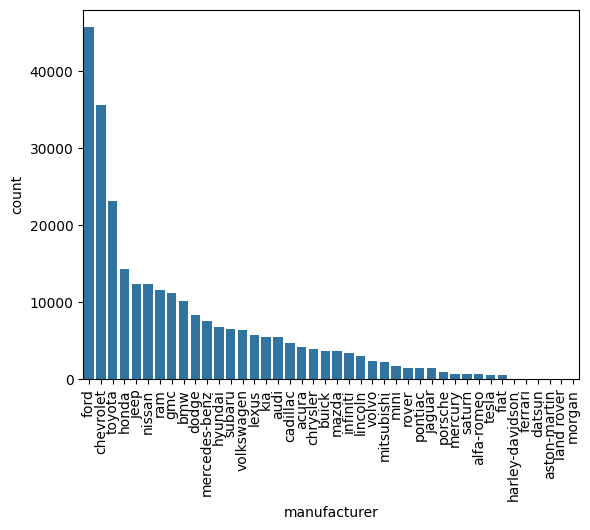

In [53]:
#look at manufacturer
sns.barplot(df['manufacturer'].value_counts())
plt.xticks(rotation=90)

Might be worth binning low count cars together to account for the imbalance

In [54]:
df['manufacturer'].value_counts()

manufacturer
ford               45678
chevrolet          35606
toyota             23219
honda              14363
jeep               12404
nissan             12390
ram                11642
gmc                11160
bmw                10216
dodge               8419
mercedes-benz       7611
hyundai             6812
subaru              6547
volkswagen          6422
lexus               5798
kia                 5484
audi                5460
cadillac            4712
acura               4262
chrysler            3995
buick               3729
mazda               3685
infiniti            3412
lincoln             3038
volvo               2395
mitsubishi          2270
mini                1704
rover               1493
pontiac             1471
jaguar              1444
porsche              990
mercury              754
saturn               679
alfa-romeo           676
tesla                636
fiat                 562
harley-davidson      104
ferrari               59
datsun                35
aston-martin

In [55]:
def transform12(df):
    labels_to_map = ["saturn", "mercury", "harley-davidson", "datsun", "ferrari", "aston-martin", "morgan"]
    df['manufacturer'] = df['manufacturer'].apply(lambda x: 'other' if x in labels_to_map else x)
    #just mark as unknown
    df.loc[np.where(df['manufacturer'].isnull())[0], 'manufacturer'] = 'Unknown manufacturer'
transform12(df)
process_pipline.append(transform12)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'ford'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'toyota'),
  Text(3, 0, 'honda'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'nissan'),
  Text(6, 0, 'ram'),
  Text(7, 0, 'gmc'),
  Text(8, 0, 'Unknown manufacturer'),
  Text(9, 0, 'bmw'),
  Text(10, 0, 'dodge'),
  Text(11, 0, 'mercedes-benz'),
  Text(12, 0, 'hyundai'),
  Text(13, 0, 'subaru'),
  Text(14, 0, 'volkswagen'),
  Text(15, 0, 'lexus'),
  Text(16, 0, 'kia'),
  Text(17, 0, 'audi'),
  Text(18, 0, 'cadillac'),
  Text(19, 0, 'acura'),
  Text(20, 0, 'chrysler'),
  Text(21, 0, 'buick'),
  Text(22, 0, 'mazda'),
  Text(23, 0, 'infiniti'),
  Text(24, 0, 'lincoln'),
  Text(25, 0, 'volvo'),
  Text(26, 0, 'mitsubishi'),
  Text(27, 0, 'mini'),
  Text(28, 0, 'other'),
  Text(29, 0, 'rover'),
  Text(30, 0, 'pontiac'),
  Text(31,

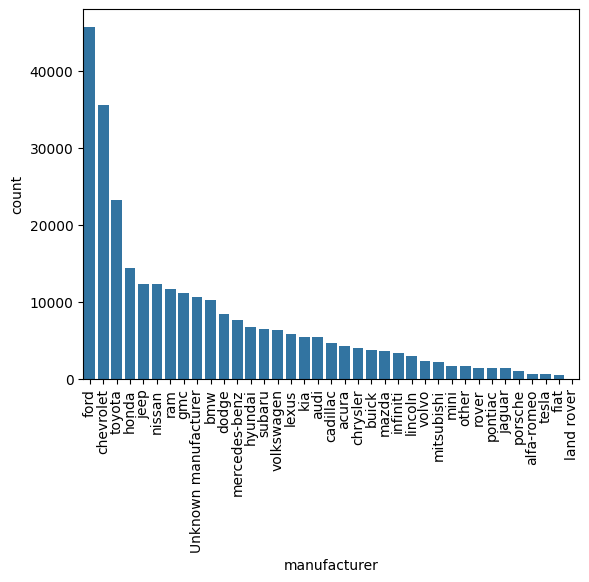

In [56]:
#look at manufacturer
sns.barplot(df['manufacturer'].value_counts())
plt.xticks(rotation=90)

Less imbalance

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'ford'),
  Text(1, 0, 'Unknown manufacturer'),
  Text(2, 0, 'buick'),
  Text(3, 0, 'subaru'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'dodge'),
  Text(6, 0, 'hyundai'),
  Text(7, 0, 'chevrolet'),
  Text(8, 0, 'toyota'),
  Text(9, 0, 'honda'),
  Text(10, 0, 'lexus'),
  Text(11, 0, 'acura'),
  Text(12, 0, 'infiniti'),
  Text(13, 0, 'mini'),
  Text(14, 0, 'volvo'),
  Text(15, 0, 'lincoln'),
  Text(16, 0, 'volkswagen'),
  Text(17, 0, 'mercedes-benz'),
  Text(18, 0, 'chrysler'),
  Text(19, 0, 'gmc'),
  Text(20, 0, 'ram'),
  Text(21, 0, 'kia'),
  Text(22, 0, 'cadillac'),
  Text(23, 0, 'nissan'),
  Text(24, 0, 'porsche'),
  Text(25, 0, 'jeep'),
  Text(26, 0, 'mitsubishi'),
  Text(27, 0, 'audi'),
  Text(28, 0, 'rover'),
  Text(29, 0, 'mazda'),
  Text(30, 0, 'jaguar'),
  Text(31

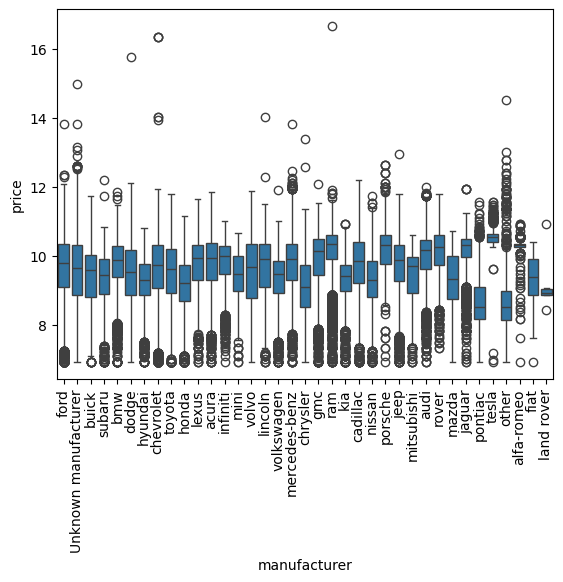

In [57]:
sns.boxplot(df, x='manufacturer', y='price')
plt.xticks(rotation=90)

Prices still vary

In [58]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.315297
manufacturer    0.000000
model           0.940927
condition       0.000000
cylinders       0.000000
fuel            0.712168
odometer        0.568528
title_status    1.824753
transmission    0.494049
drive           0.000000
type            0.000000
paint_color     0.000000
image_url       0.000000
description     0.000355
state           0.000000
lat             0.946956
long            0.946956
posting_date    0.000000
has_VIN         0.000000
dtype: float64

In [59]:
#about 1-2% missing just drop na

In [60]:
def transform13(df):
    df.dropna(inplace=True)
    df.reset_index(inplace=True, drop=True)
transform13(df)
process_pipline.append(transform13)

In [61]:
#Inspect proportion of NULL values
df.isnull().sum()/df.shape[0]*100

id              0.0
url             0.0
region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
image_url       0.0
description     0.0
state           0.0
lat             0.0
long            0.0
posting_date    0.0
has_VIN         0.0
dtype: float64

In [62]:
#We have a somewhat clean dataset to use now

In [63]:
df.to_csv("./half_cleaned_vehicles.csv", index=False)

In [64]:
df.shape

(267038, 24)

In [65]:
(341504-267038)/341504

0.2180530828335832

In [66]:
#We dropped about 22% of data in total from cleaning NULL values and weird prices

In [67]:
test.reset_index(inplace=True, drop=True)
for transformation in process_pipline:
    try:
        #Patch to force it to work if need to rerun
        transformation(test)
    except Exception as e:
        print(e)
test.to_csv("./half_cleaned_vehicles_testvalset.csv", index=False)